In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC
pd.options.display.float_format = '{:,.3f}'.format

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv('winequality-red-1.csv', sep = ';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


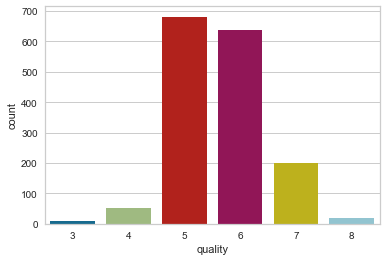

In [6]:
sns.countplot(df['quality'])

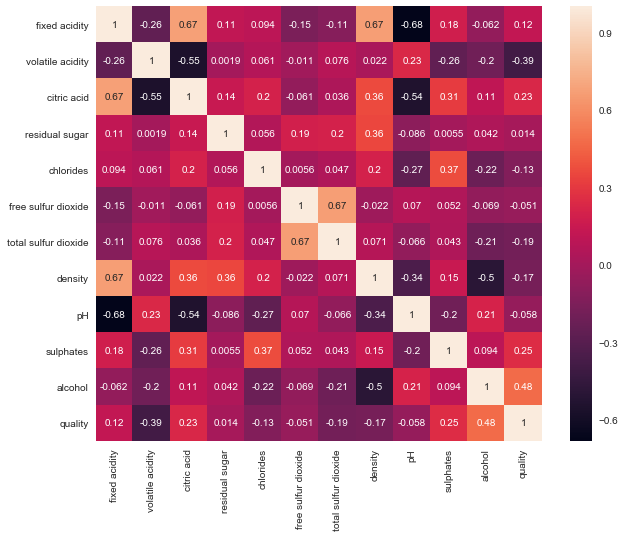

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
mapping = {7:8, 3:5, 4:5}

df['quality'] = df['quality'].replace(mapping)

In [11]:
df['quality'].value_counts()

5    744
6    638
8    217
Name: quality, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
# interview tip
# list comprehension

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
cols = df.columns
new_cols = []

for i ,v in enumerate(cols):
    if v !='quality':
        new_cols.append(v)

In [15]:
new_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [20]:
features = [col for col in df.columns if col !='quality']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(df[features], df['quality'], test_size = 0.3, random_state = 22)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
model_entropy.score(xtrain,ytrain)

1.0

In [25]:
model_entropy.score(xtest,ytest)

0.6458333333333334

In [30]:
clf_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_pruned.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
clf_pruned.score(xtrain,ytrain)

0.6487935656836461

In [32]:
from sklearn import tree
fn = features
cn = ['5','6','8']

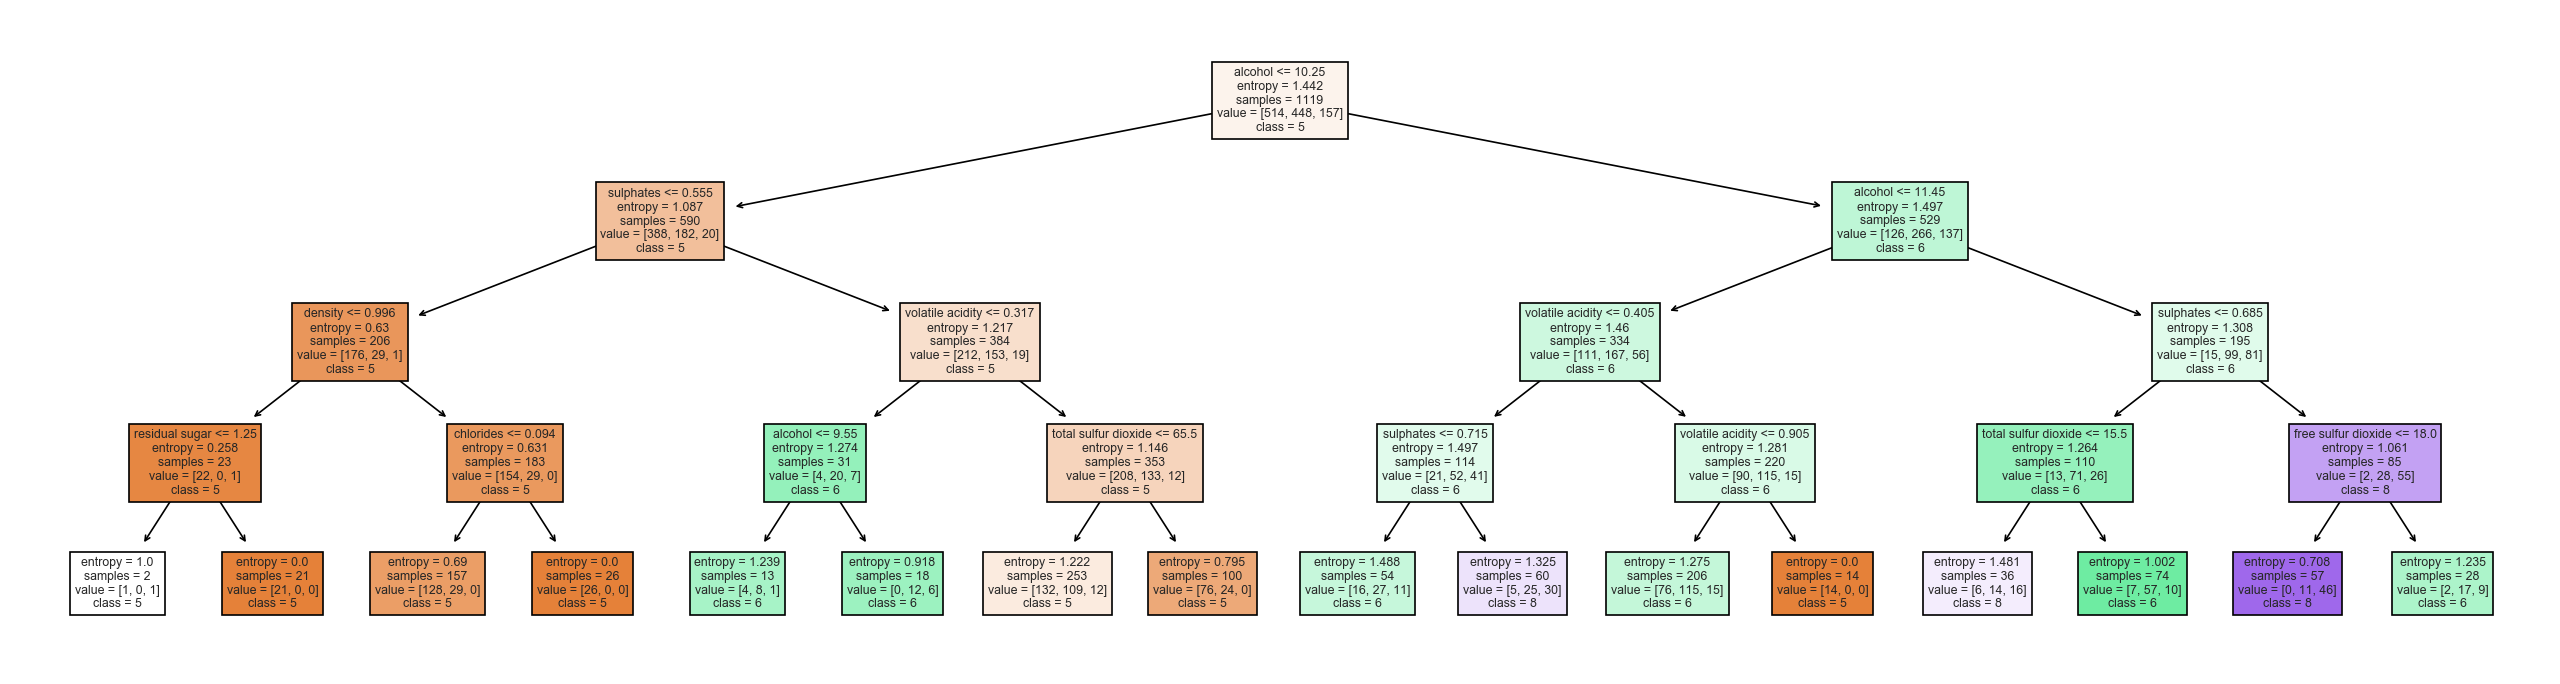

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols=1, figsize = (8,2), dpi=400)
tree.plot_tree(clf_pruned, feature_names= fn, class_names= cn, filled = True)
fig.savefig('image.png')

In [34]:
preds_train = clf_pruned.predict(xtrain)
preds_test = clf_pruned.predict(xtest)

acc_DT = accuracy_score(ytest,preds_test)


In [35]:
acc_DT

0.61875

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


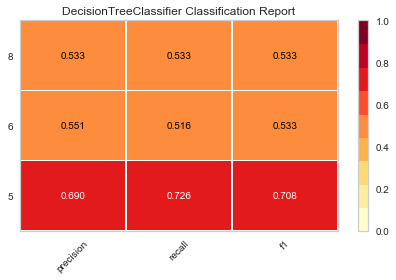

In [36]:
viz = ClassificationReport(DecisionTreeClassifier(criterion='entropy', max_depth=4))
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


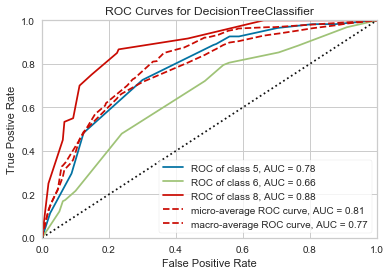

In [37]:
roc = ROCAUC(DecisionTreeClassifier(criterion='entropy', max_depth=4))
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

In [38]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6
1596,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5


In [39]:
clf_pruned.predict_proba(df[features])[:,0]

array([0.52173913, 0.76      , 0.52173913, ..., 0.36893204, 0.52173913,
       0.2962963 ])

In [40]:
df['ProbQuality_5'] = clf_pruned.predict_proba(df[features])[:,0]
df['ProbQuality_6'] = clf_pruned.predict_proba(df[features])[:,1]
df['ProbQuality_8'] = clf_pruned.predict_proba(df[features])[:,2]

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ProbQuality_5,ProbQuality_6,ProbQuality_8
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,0.522,0.431,0.047
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,0.760,0.240,0.000
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,0.522,0.431,0.047
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,0.000,0.667,0.333
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,0.522,0.431,0.047


In [43]:
clf_pruned.feature_importances_

array([0.        , 0.16960678, 0.        , 0.00861248, 0.01539413,
       0.03347123, 0.06022505, 0.01824921, 0.        , 0.17677034,
       0.51767079])

In [44]:
pd.DataFrame(clf_pruned.feature_importances_,df[features].columns).reset_index()

,index,0
0,fixed acidity,0.000
1,volatile acidity,0.170
2,citric acid,0.000
3,residual sugar,0.009
4,chlorides,0.015
5,free sulfur dioxide,0.033
6,total sulfur dioxide,0.060
7,density,0.018
8,pH,0.000
9,sulphates,0.177


In [ ]:
# recursive feature elimination (RFE)

#rfe.optimal_features()

In [45]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf

,Method,accuracy
0,Decision Tree,0.619


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=50)
rfcl = rfcl.fit(xtrain,ytrain)

In [47]:
pred_RF = rfcl.predict(xtest)
acc_RF = accuracy_score(ytest,pred_RF)

In [48]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF})

In [49]:
resultsDf = pd.concat([resultsDf,tempResultsDf])

In [50]:
resultsDf

,Method,accuracy
0,Decision Tree,0.619
0,Random Forest,0.681


C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


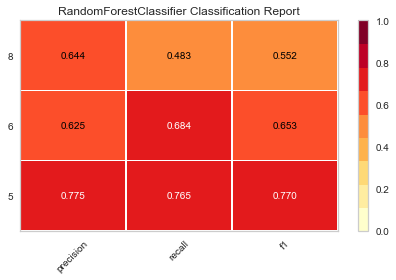

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


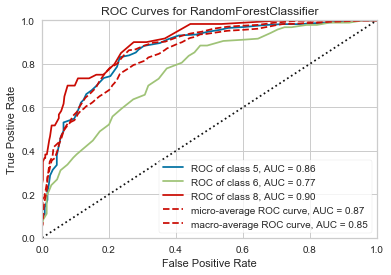

In [51]:
viz = ClassificationReport(RandomForestClassifier(n_estimators=50))
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators=50))
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

In [52]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,max_samples = 0.7, bootstrap=True, oob_score = True, random_state=22)

In [53]:
bgcl = bgcl.fit(xtrain,ytrain)

pred_BG = bgcl.predict(xtest)
acc_BG = accuracy_score(ytest,pred_BG)

In [54]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': acc_BG})
resultsDf = pd.concat([resultsDf,tempResultsDf])

In [55]:
resultsDf

,Method,accuracy
0,Decision Tree,0.619
0,Random Forest,0.681
0,Bagging,0.675


C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


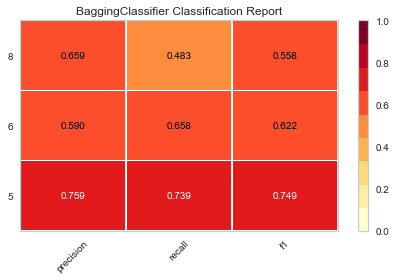

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


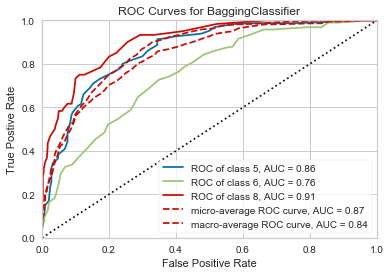

In [56]:
viz = ClassificationReport(BaggingClassifier(n_estimators=50,max_samples = 0.7, bootstrap=True, oob_score = True, random_state=22))
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50,max_samples = 0.7, bootstrap=True, oob_score = True, random_state=22))
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

### Boosting - Ada Boosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=22,base_estimator = LogisticRegression())
abcl = abcl.fit(xtrain,ytrain)

pred_AB = abcl.predict(xtest)
acc_AB = accuracy_score(ytest,pred_AB)

In [59]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': acc_AB})
resultsDf = pd.concat([resultsDf,tempResultsDf])

In [60]:
resultsDf

,Method,accuracy
0,Decision Tree,0.619
0,Random Forest,0.681
0,Bagging,0.675
0,Adaboost,0.621


C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


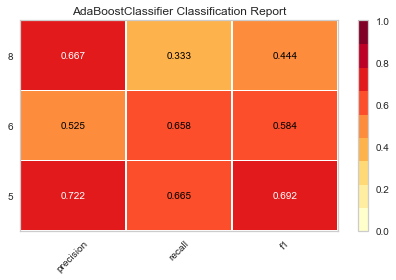

C:\Users\selvam.periyasamy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


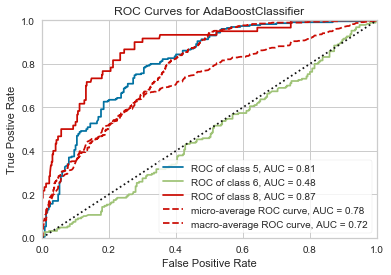

In [61]:
viz = ClassificationReport(AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=22))
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=22))
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show()

### Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=22)
gbcl = gbcl.fit(xtrain,ytrain)

In [63]:
pred_GB = gbcl.predict(xtest)
acc_GB = accuracy_score(ytest,pred_GB)

In [64]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': acc_GB})
resultsDf = pd.concat([resultsDf,tempResultsDf])

In [65]:
resultsDf

,Method,accuracy
0,Decision Tree,0.619
0,Random Forest,0.681
0,Bagging,0.675
0,Adaboost,0.621
0,Gradient Boost,0.635


In [ ]:
# Grid Search CV.....smaller datasets
# Random Search CV....larger datasets

# class